# Homework 3
#### Team: Jair Aguirre and William Gottschalk, Friday Section

In [10]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
lb = LabelBinarizer()
X = imp.fit_transform(pd.read_csv('trainingData.txt', sep='\t', header=None))
# Y = lb.fit_transform(pd.read_csv('trainingTruth.txt', sep='\t', header=None))
Y = pd.read_csv('trainingTruth.txt', sep='\t', header=None)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.5, random_state=0
)

print(X_train.shape, y_train.shape)

(8689, 334) (8689, 1)


In [4]:
# clf = RandomForestClassifier(n_estimators=30)
# scores = cross_val_score(clf, X_train, y_train, scoring='f1', n_jobs=-1)

In [5]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

/Users/willg/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

0.64564391759696171

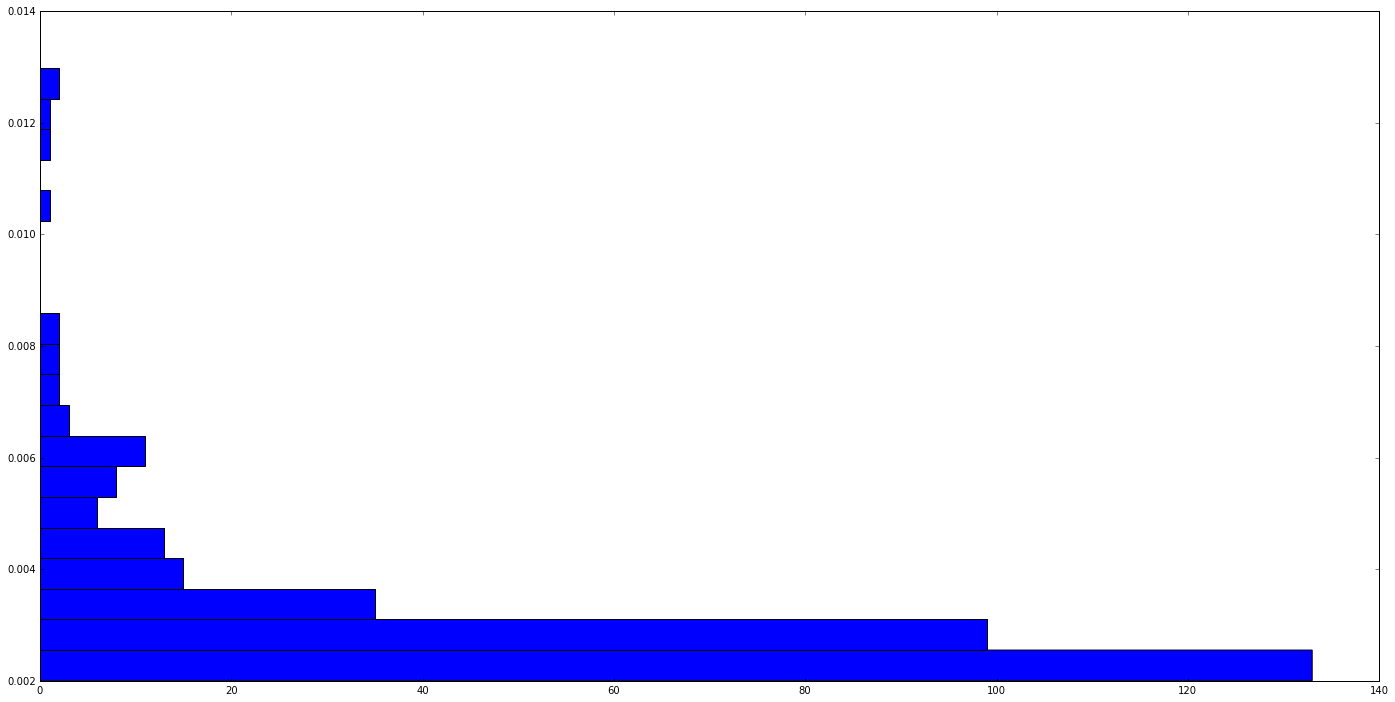

In [58]:
columns = pd.DataFrame(X).columns
sorted_features = sorted(zip(columns, clf.feature_importances_), key = lambda x: x[1], reverse=True)
# print(sorted_features[:40])

fig_size = plt.rcParams["figure.figsize"]
fig_size = (24, 12)

# plt.yticks([x / 2000 for x in range(0, 40, 1)])
plt.hist(clf.feature_importances_, bins=20, align='right', orientation='horizontal', rwidth=5)

clf.score(X_test, y_test)